# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [102]:
# Import your libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import sklearn
import statsmodels.api as smf
from sklearn import metrics

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [103]:
# Your code here
diabetes = sklearn.datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [104]:
diabetes.keys()



dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [105]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

What are the variables in this dataset according to the description? List them in the markdown cell below

In [106]:
# The variables are age,sex, body mass index, average blood and pressure, and six 
# blood serum measurements, acoording to what is said in the dataset description.

#### Enter your answer here:




Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [107]:
diabetes["data"].shape
#(422,)

(442, 10)

# Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [108]:
from sklearn.linear_model import LinearRegression as LinReg

Initialize the model in the variable `diabetes_model`

In [109]:
y = diabetes["target"]
X = diabetes["data"]
diabetes_model = LinReg()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [110]:
diabetes_model.fit(X, y)
print(diabetes_model.intercept_)
print(diabetes_model.coef_)

152.13348416289597
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


In [111]:
import matplotlib.pyplot as plt
# for i in range(10):
#     plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
#     sns.scatterplot(x=diabetes.data[:, i], y=diabetes.target)
#     plt.title(f'Scatter Plot for Feature {i+1} vs Target')
#     plt.xlabel(f'Feature {i+1}')
#     plt.ylabel('Target Variable')
#     plt.show()

Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [112]:
# H0: is that there is no relation between the all data features and the diabetes.
# H1: is that there is relationship between the features and the diabetes.
X = smf.add_constant(X)
#results = smf.ols("target ~ data", data = diabetes).fit()
results = smf.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                        16:47:56   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
x1           -10.0099     59.749     -0.168      0.867    -127.446     107.426
x2          -239.8156     61.222     -3.917      0.000    -360.147    -119.484
x3           519.8459     66.533      7.813      0.000     389.076     650.616
x4           324.3846     65.422      4.958      0.000     195.799     452.970
x5          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
x6           476.7390    339.030      1.406      0.160    -189.620    1143.098
x7           101.0433    212.531      0.475      0.635    -316.684     518.770
x8           177.0632    161.476      1.097      0.273    -140.315     494.441
x9           751.2737    171.900      4.370      0.000     413.407    1089.140
x10           67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [113]:
# Your code here:
auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [114]:
# Your code here:
auto.head()


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [115]:
# Your code here:
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [116]:
# Your code here:
mini = min(auto["model_year"])
print(mini)
maxi = max(auto["model_year"])
print(maxi)

70
82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [117]:
# Your code here:
auto.isnull().sum()
auto.dropna(inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [118]:
auto["cylinders"].value_counts()

#There are 5 

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [119]:
auto

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,"\t""ford mustang gl"""
394,44.0,4,97.0,52.0,2130,24.6,82,"\t""vw pickup"""
395,32.0,4,135.0,84.0,2295,11.6,82,"\t""dodge rampage"""
396,28.0,4,120.0,79.0,2625,18.6,82,"\t""ford ranger"""


In [120]:
auto = auto.drop(columns="car_name")
from sklearn.model_selection import train_test_split

X = auto.drop(columns="mpg")
y = auto["mpg"]



Now we will test the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [121]:
auto_model = LinReg()

Next, fit the model in the cell below.

In [122]:
# Your code here:
auto_model.fit(X_train, y_train)

LinearRegression()

# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [123]:
y_pred = auto_model.predict(X_test)
y_pred

array([32.5032214 , 28.61387011, 19.47847725, 26.16161575, 31.00349495,
       23.68772989, 25.84327357, 13.55693682, 32.12380669, 28.0556387 ,
       21.55154864, 21.14857416, 16.2595604 , 17.91615718, 12.30402609,
        9.69853469, 32.00297822, 12.53766261, 10.03666516, 33.50160579,
       30.36480462, 29.59245781, 30.19176406, 33.24436377, 26.35592217,
       27.59827488, 33.6241364 , 27.85070091, 28.87789652, 15.03089065,
       26.60517023, 11.0785454 , 21.07784699, 15.12377781, 33.0809791 ,
        9.7388948 , 28.20921163, 30.35306924, 24.64174786, 25.48294936,
       13.81967699, 26.35737044, 19.6405416 , 12.82787774,  8.23298288,
       27.28742164, 33.50823381, 25.6920757 , 26.80552802, 18.10417406,
       31.39359384, 15.01180677, 32.19554162, 13.45854247, 16.21190054,
       16.28050925, 28.58359898, 10.34262433, 32.55917961, 18.8223611 ,
       30.17365061, 25.80723828,  9.73652788, 23.17315166, 24.91505779,
       34.43449336, 28.79720498, 21.87262472, 24.68988386, 10.50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MAE, error: 2.7658614520566718
MSE, error: 13.667338800726686
RMSE, error: 3.6969364074496447
r2: 0.8035180107891927


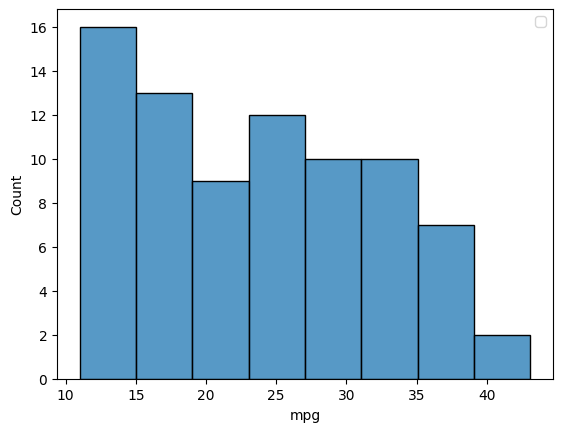

In [124]:
sns.histplot(y_test)
plt.legend();

print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"r2: {metrics.r2_score(y_test, y_pred)}") 

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [125]:
y_train_pred = auto_model.predict(X_train)
print(f"Ytest prediction has r2: {metrics.r2_score(y_test, y_pred)}") 
print(f"Ytrain prediction has r2: {metrics.r2_score(y_train, y_train_pred)}") 

Ytest prediction has r2: 0.8035180107891927
Ytrain prediction has r2: 0.8088101169749278


# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [126]:
X_train09,X_test09,y_train09,y_test09 = train_test_split(X, y, test_size = 0.1)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [127]:
auto_model09 = LinReg()
auto_model09.fit(X_train09, y_train09)

LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

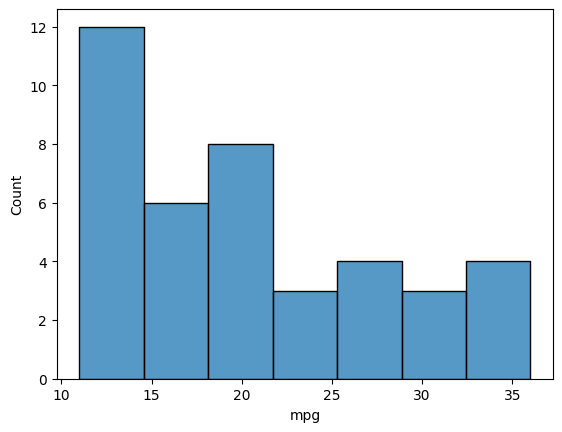

In [128]:
y_pred09 = auto_model09.predict(X_test09)
sns.histplot(y_test09);

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [129]:
y_train_pred09 = auto_model.predict(X_train09)
print(f"Ytest09 prediction r2: {metrics.r2_score(y_test09, y_pred09)}")
print(f"Ytrain09 prediction r2: {metrics.r2_score(y_train09, y_train_pred09)}")
#Bigger set test
print(f"Ytest08 prediction has r2: {metrics.r2_score(y_test, y_pred)}") 
print(f"Ytrain08 prediction has r2: {metrics.r2_score(y_train, y_train_pred)}") 

Ytest09 prediction r2: 0.8391381938136697
Ytrain09 prediction r2: 0.799751608652389
Ytest08 prediction has r2: 0.8035180107891927
Ytrain08 prediction has r2: 0.8088101169749278


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [130]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [131]:
RFE_model = sklearn.feature_selection.RFE(auto_model, n_features_to_select=3)

Fit the model and print the ranking

In [137]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#auto_model.fit(X_train, y_train)
RFE_model.fit(X_train, y_train)
RFE_model.ranking_
dict_ = {}
for j, k in zip(RFE_model.ranking_, X_train.columns):
    dict_[k] = j
dict_

{'cylinders': 1,
 'displacement': 4,
 'horse_power': 2,
 'weight': 3,
 'acceleration': 1,
 'model_year': 1}

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_train_reduced`, `y_test_reduced`. Use an 80% split.

In [139]:
small_auto_model = auto[["cylinders", "acceleration","model_year"]]
y_mpg = y
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(small_auto_model, y_mpg, test_size = 0.2)

new_model = LinReg()
new_model.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = new_model.predict(X_test_reduced)

print(f"r2: {metrics.r2_score(y_test_reduced, y_pred_reduced)}")

r2: 0.6968438082022512


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [134]:
# It did not improved the model. So a more correlation between the columns with the feature we want to 
# predict does not mean that R2 value has to be higher.

